<a href="https://colab.research.google.com/github/Bast1-py/Experience-Developing-Projects/blob/main/Stock_Price_Forecasting_of_Reliance_Industries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data sets diperoleh dari sumber open data : https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data/data

NSE (Bursa Efek Nasional) adalah lembaga penting nasional yang berstatus internasional lembaga infrastruktur pasar terpercaya dengan standar tata kelola perusahaan yang tinggi.

Sebagai merek lokal dengan visi global, NSE dianggap sebagai salah satu bursa terbesar di dunia dan katalisator untuk mendorong pertumbuhan ekonomi India. NSE merupakan bursa pertama di India yang menerapkan perdagangan elektronik atau berbasis layar yang mulai beroperasi pada tahun 1994; pelopor dalam teknologi yang menjamin keandalan dan kinerja sistemnya melalui budaya inovasi dan investasi dalam teknologi. NSE mengoperasikan ekosistem pasar untuk menghadirkan transparansi & efisiensi.

Platform teknologi canggih kami menawarkan tingkat ketahanan, keamanan, dan ketahanan tingkat tinggi untuk peluang perdagangan dan investasi di semua kelas aset dan untuk semua kategori investor. NSE berfokus pada perlindungan investor dan pengembangan lanskap pasar modal India secara disiplin.

Identitas NSE yang dibangun pada tahun sembilan puluhan selama 25 tahun terakhir melambangkan keandalan, keahlian, inovasi, dan kepercayaan. Dalam 25 tahun terakhir, perekonomian dan lanskap teknologi India telah berubah secara dramatis. Begitu pula dengan NSE.

Identitas baru NSE mencerminkan sifat multi-dimensinya: berbagai kelas aset, berbagai segmen pelanggan, dan berbagai perannya termasuk, bursa, regulator, penyedia indeks, data dan analitik, layanan TI, pendidik, dan pengembang pasar.

In [ ]:
!pip install pmdarima

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
import altair as alt
import warnings
warnings.filterwarnings('ignore')
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl1')


from datetime import datetime
from pandas import Series
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
# from fbprophet import Prophet
# from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
# from prophet.diagnostics import cross_validation
# from prophet.diagnostics import performance_metrics
# from prophet.plot import plot_cross_validation_metric


rcParams['figure.figsize'] = 20,10
sns.set_style('darkgrid')

In [ ]:
df = pd.read_csv('RELIANCE.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [ ]:
df.head(11)

Date    Symbol Series  Prev Close    Open    High     Low    Last  \
0   2000-01-03  RELIANCE     EQ      233.05  237.50  251.70  237.50  251.70   
1   2000-01-04  RELIANCE     EQ      251.70  258.40  271.85  251.30  271.85   
2   2000-01-05  RELIANCE     EQ      271.85  256.65  287.90  256.65  286.75   
3   2000-01-06  RELIANCE     EQ      282.50  289.00  300.70  289.00  293.50   
4   2000-01-07  RELIANCE     EQ      294.35  295.00  317.90  293.00  314.50   
5   2000-01-10  RELIANCE     EQ      314.55  317.40  318.70  305.30  306.65   
6   2000-01-11  RELIANCE     EQ      308.50  307.95  310.95  283.85  288.50   
7   2000-01-12  RELIANCE     EQ      288.50  289.00  305.00  282.15  304.70   
8   2000-01-13  RELIANCE     EQ      301.70  306.00  316.40  304.10  309.75   
9   2000-01-14  RELIANCE     EQ      311.85  309.50  321.65  309.50  317.00   
10  2000-01-17  RELIANCE     EQ      316.30  318.25  322.90  307.05  307.50   

     Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0   251.70  249.37   4456424  1.111319e+14     NaN                 NaN   
1   271.85  263.52   9487878  2.500222e+14     NaN                 NaN   
2   282.50  274.79  26833684  7.373697e+14     NaN                 NaN   
3   294.35  295.45  15682286  4.633254e+14     NaN                 NaN   
4   314.55  308.91  19870977  6.138388e+14     NaN                 NaN   
5   308.50  312.35  13417057  4.190855e+14     NaN                 NaN   
6   288.50  296.40  12544322  3.718192e+14     NaN                 NaN   
7   301.70  294.57  12109507  3.567081e+14     NaN                 NaN   
8   311.85  311.79  17076042  5.324181e+14     NaN                 NaN   
9   316.30  316.17  13460592  4.255879e+14     NaN                 NaN   
10  308.75  315.77  10729180  3.387984e+14     NaN                 NaN   

    %Deliverble  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
5           NaN  
6           NaN  
7           NaN  
8           NaN  
9           NaN  
10          NaN

In [ ]:
df.tail(11)

Date    Symbol Series  Prev Close     Open     High      Low  \
5295  2021-04-15  RELIANCE     EQ     1931.80  1926.30  1961.00  1913.00   
5296  2021-04-16  RELIANCE     EQ     1944.30  1936.60  1949.90  1926.45   
5297  2021-04-19  RELIANCE     EQ     1932.10  1904.00  1916.40  1890.00   
5298  2021-04-20  RELIANCE     EQ     1901.70  1910.50  1919.00  1890.45   
5299  2021-04-22  RELIANCE     EQ     1901.15  1892.25  1914.45  1876.70   
5300  2021-04-23  RELIANCE     EQ     1906.40  1906.00  1918.90  1895.35   
5301  2021-04-26  RELIANCE     EQ     1904.35  1920.00  1962.00  1911.50   
5302  2021-04-27  RELIANCE     EQ     1937.85  1940.00  1997.20  1938.25   
5303  2021-04-28  RELIANCE     EQ     1988.65  1997.85  2008.00  1980.15   
5304  2021-04-29  RELIANCE     EQ     1997.30  2022.90  2044.50  2007.30   
5305  2021-04-30  RELIANCE     EQ     2024.05  2008.50  2036.00  1987.55   

         Last    Close     VWAP   Volume      Turnover    Trades  \
5295  1943.00  1944.30  1933.33  9102492  1.759815e+15  189159.0   
5296  1929.00  1932.10  1935.23  7225679  1.398336e+15  206958.0   
5297  1903.05  1901.70  1902.57  8527967  1.622506e+15  271570.0   
5298  1905.00  1901.15  1906.74  7939490  1.513854e+15  202431.0   
5299  1905.10  1906.40  1898.59  6687573  1.269695e+15  209895.0   
5300  1903.35  1904.35  1907.47  5459016  1.041289e+15  171621.0   
5301  1938.00  1937.85  1941.32  9620785  1.867699e+15  259137.0   
5302  1990.00  1988.65  1978.64  9226547  1.825602e+15  291197.0   
5303  1993.15  1997.30  1997.60  7902002  1.578508e+15  247331.0   
5304  2020.00  2024.05  2024.21  8035915  1.626634e+15  213153.0   
5305  1995.90  1994.50  2010.20  9150974  1.839532e+15  288687.0   

      Deliverable Volume  %Deliverble  
5295           4483830.0       0.4926  
5296           3583568.0       0.4959  
5297           3886582.0       0.4557  
5298           4616077.0       0.5814  
5299           3155063.0       0.4718  
5300           2589266.0       0.4743  
5301           4276703.0       0.4445  
5302           3772144.0       0.4088  
5303           3921560.0       0.4963  
5304           2834103.0       0.3527  
5305           3902504.0       0.4265

In [ ]:
df.shape

(5306, 15)

In [ ]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [ ]:
df.describe()

Prev Close         Open         High          Low         Last  \
count  5306.000000  5306.000000  5306.000000  5306.000000  5306.000000   
mean   1010.984866  1012.602375  1026.823803   996.886977  1011.157143   
std     570.987079   572.575893   581.986757   560.703328   570.938608   
min     203.200000   205.500000   219.500000   197.150000   203.300000   
25%     572.137500   572.925000   582.950000   564.237500   572.062500   
50%     937.950000   939.000000   950.075000   927.550000   939.025000   
75%    1247.387500  1247.675000  1267.350000  1227.450000  1248.287500   
max    3220.850000  3298.000000  3298.000000  3141.300000  3223.000000   

             Close         VWAP        Volume      Turnover        Trades  \
count  5306.000000  5306.000000  5.306000e+03  5.306000e+03  2.456000e+03   
mean   1011.316839  1011.937409  5.583028e+06  6.076715e+14  1.452306e+05   
std     571.046753   571.222520  4.983793e+06  8.369739e+14  1.297557e+05   
min     203.200000   212.290000  5.282000e+04  4.295543e+12  2.991000e+03   
25%     572.512500   573.190000  2.836454e+06  2.203354e+14  7.215900e+04   
50%     938.275000   939.785000  4.213432e+06  3.662999e+14  1.021435e+05   
75%    1248.275000  1247.375000  6.602604e+06  6.656490e+14  1.686702e+05   
max    3220.850000  3197.750000  6.523089e+07  1.473434e+16  1.428490e+06   

       Deliverable Volume  %Deliverble  
count        4.792000e+03  4792.000000  
mean         2.280885e+06     0.435039  
std          1.882665e+06     0.144722  
min          2.909700e+04     0.076300  
25%          1.194524e+06     0.323325  
50%          1.810434e+06     0.449450  
75%          2.752935e+06     0.544300  
max          3.495888e+07     0.978300

In [ ]:
df.describe(include='object')

Date    Symbol Series
count         5306      5306   5306
unique        5306         1      1
top     2000-01-03  RELIANCE     EQ
freq             1      5306   5306

In [ ]:
df.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [ ]:
df_analisis = df.copy()
df_analisis['Date'] = df_analisis['Date'].apply(pd.to_datetime)


## membuat date menjadi bagian week, hari, bulan, dan perminggu

df_analisis['month'] = df_analisis.Date.dt.month
df_analisis['week'] = df_analisis.Date.dt.weekday
df_analisis['day'] = df_analisis.Date.dt.day
df_analisis['day of week'] = df_analisis.Date.dt.dayofweek

df_analisis.set_index('Date', drop=False, inplace=True)
df_analisis.iloc[:,15:19].head(11)

month  week  day  day of week
Date                                     
2000-01-03      1     0    3            0
2000-01-04      1     1    4            1
2000-01-05      1     2    5            2
2000-01-06      1     3    6            3
2000-01-07      1     4    7            4
2000-01-10      1     0   10            0
2000-01-11      1     1   11            1
2000-01-12      1     2   12            2
2000-01-13      1     3   13            3
2000-01-14      1     4   14            4
2000-01-17      1     0   17            0

In [ ]:
# memasukkan nilai pada missing value dengan mean (atau bisa menggunakan median)

df_analisis['Trades'].fillna(df_analisis['Trades'].median(), inplace=True)
df_analisis['Deliverable Volume'].fillna(df_analisis['Deliverable Volume'].median(), inplace=True)
df_analisis['%Deliverble'].fillna(df_analisis['%Deliverble'].median(), inplace=True)
df_analisis.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
month                 0
week                  0
day                   0
day of week           0
dtype: int64

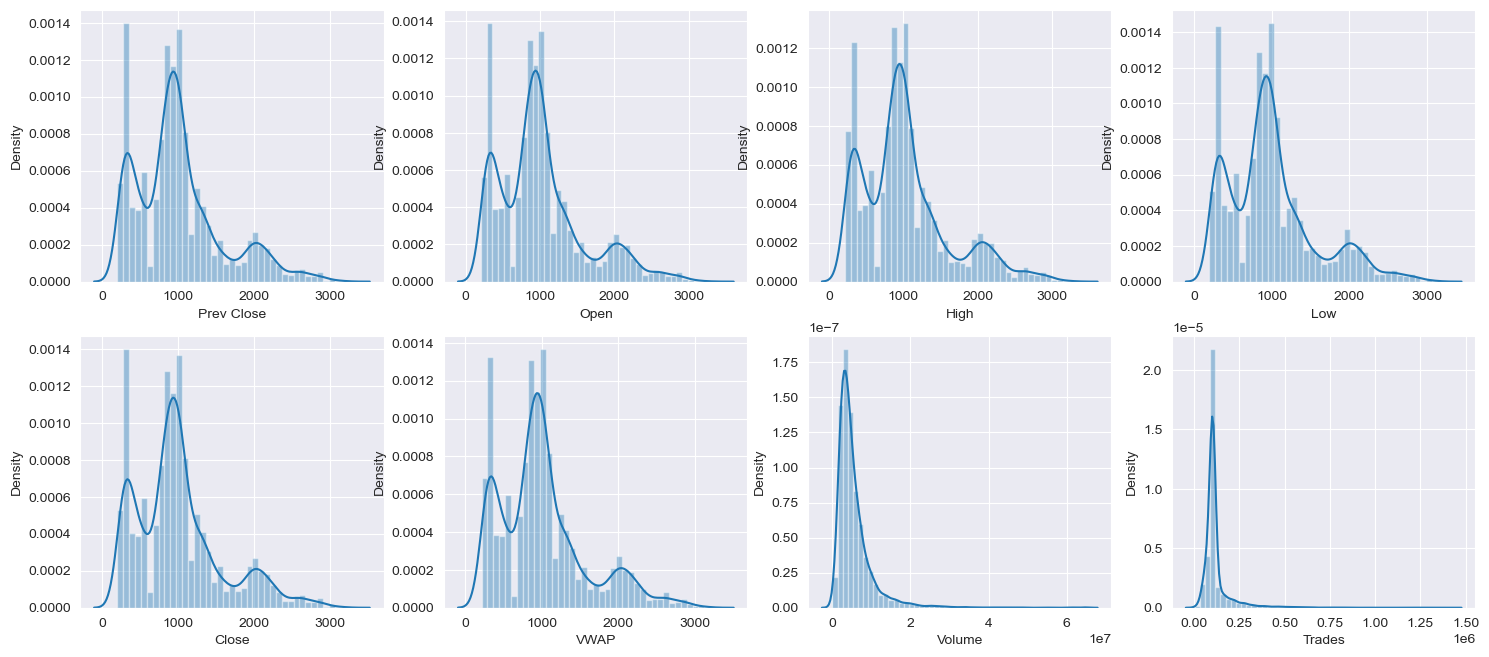

In [ ]:
plt.figure(figsize= (15, 7))

plt.subplot(341)
sns.distplot(df_analisis['Prev Close'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(342)
sns.distplot(df_analisis['Open'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(343)
sns.distplot(df_analisis['High'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(344)
sns.distplot(df_analisis['Low'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(345)
sns.distplot(df_analisis['Close'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(346)
sns.distplot(df_analisis['VWAP'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(347)
sns.distplot(df_analisis['Volume'])
fig = plt.gcf()
fig.set_size_inches(18,12)


plt.subplot(348)
sns.distplot(df_analisis['Trades'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.show()

In [ ]:
fig = px.line(df_analisis,
             x='Date',
             y='VWAP',
             title='VWAP Over Years (Use Rangeslider to Slide Over Time)')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1,
                 label='1m',
                 step='month',
                 stepmode='backward'),
            dict(count=6,
                label='6m',
                step='month',
                stepmode='backward'),
            dict(count=1,
                label='YTD',
                step='year',
                stepmode='backward'),
            dict(count=1,
                label='1y',
                step='year',
                stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

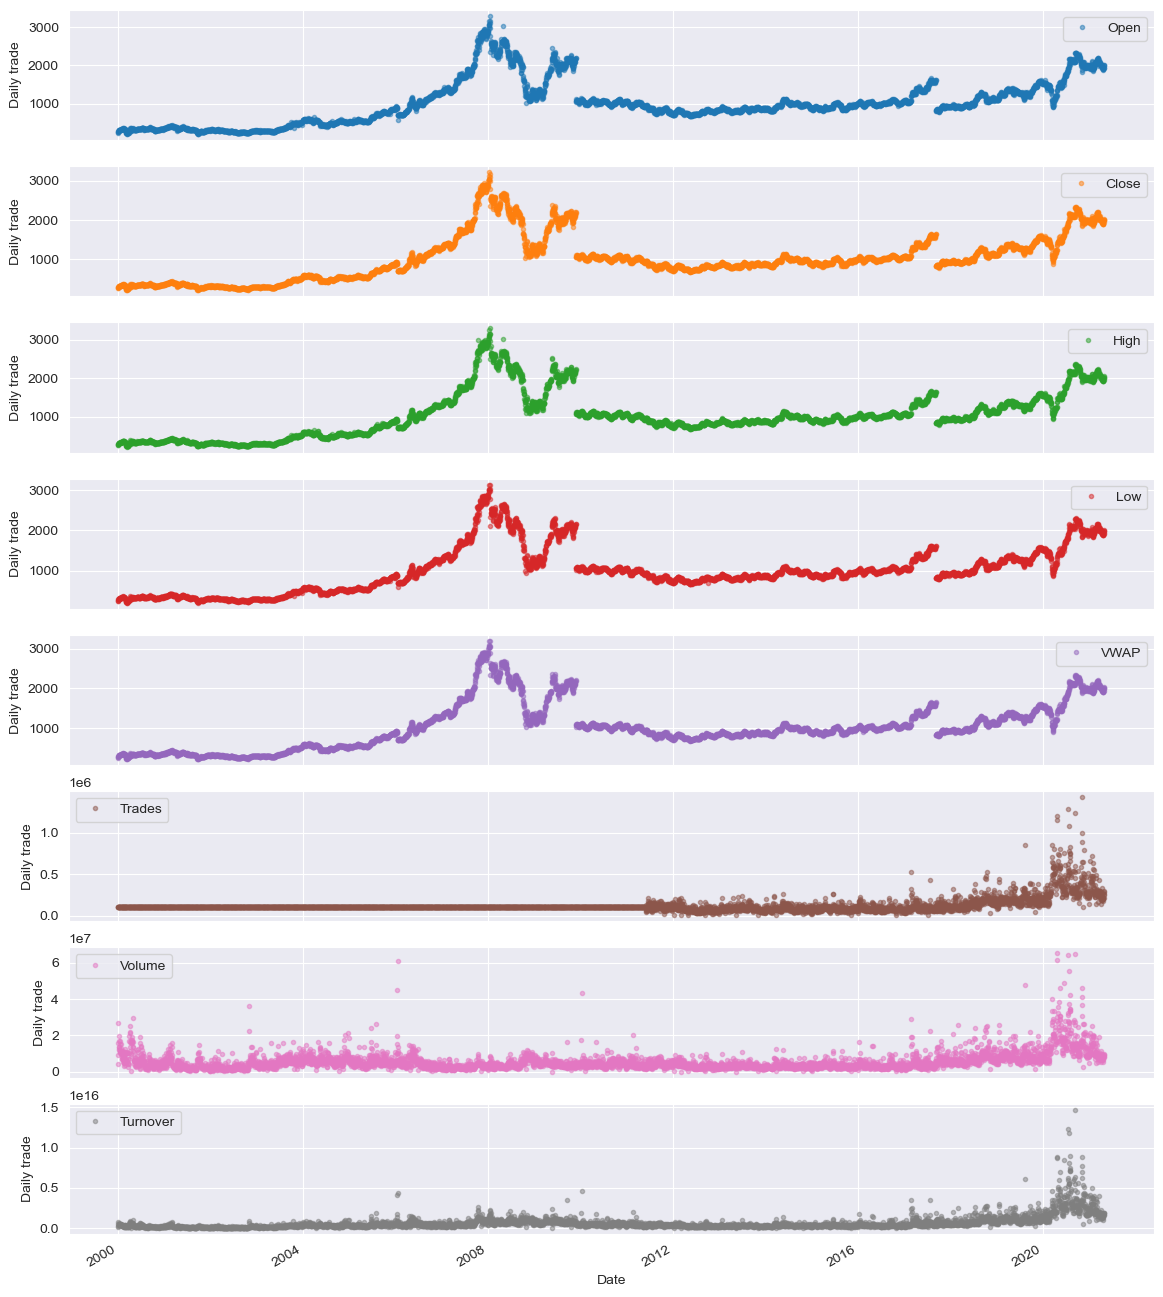

In [ ]:
cols_plot = ['Open', 'Close', 'High','Low','VWAP','Trades','Volume','Turnover']
axes = df_analisis[cols_plot].plot(marker='.',
                                   alpha=0.5,
                                   linestyle='None',
                                   figsize=(14,18),
                                   subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

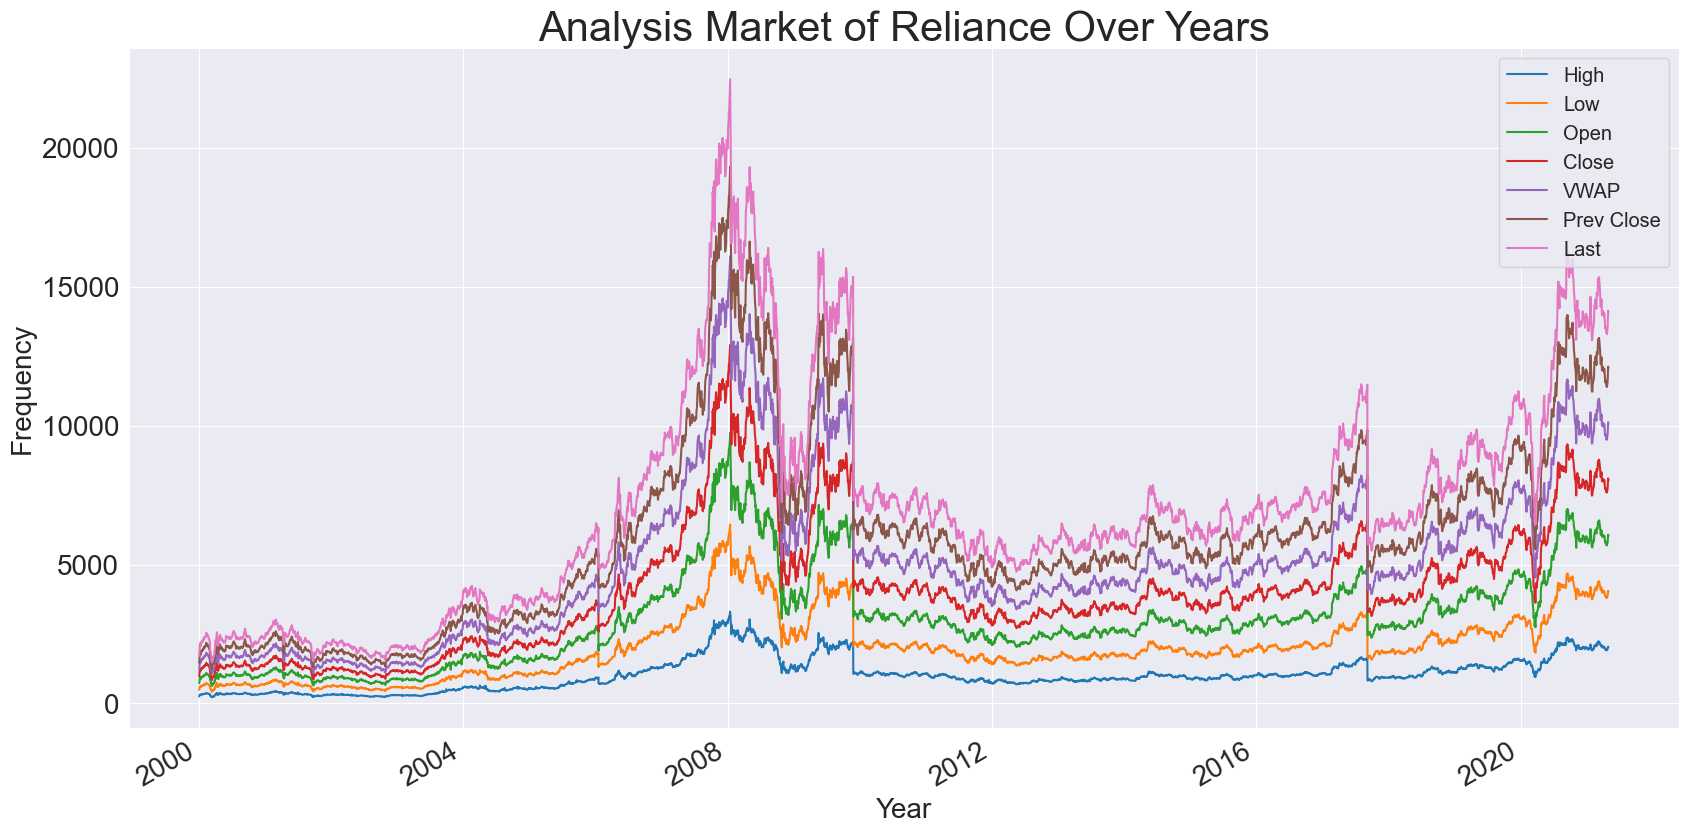

In [ ]:
ax = df_analisis[['High','Low','Open','Close','VWAP','Prev Close','Last']].plot(stacked=True)
ax.set_title('Analysis Market of Reliance Over Years', fontsize=30)
ax.set_ylabel('Frequency', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize='x-large', loc='upper right')
plt.show()

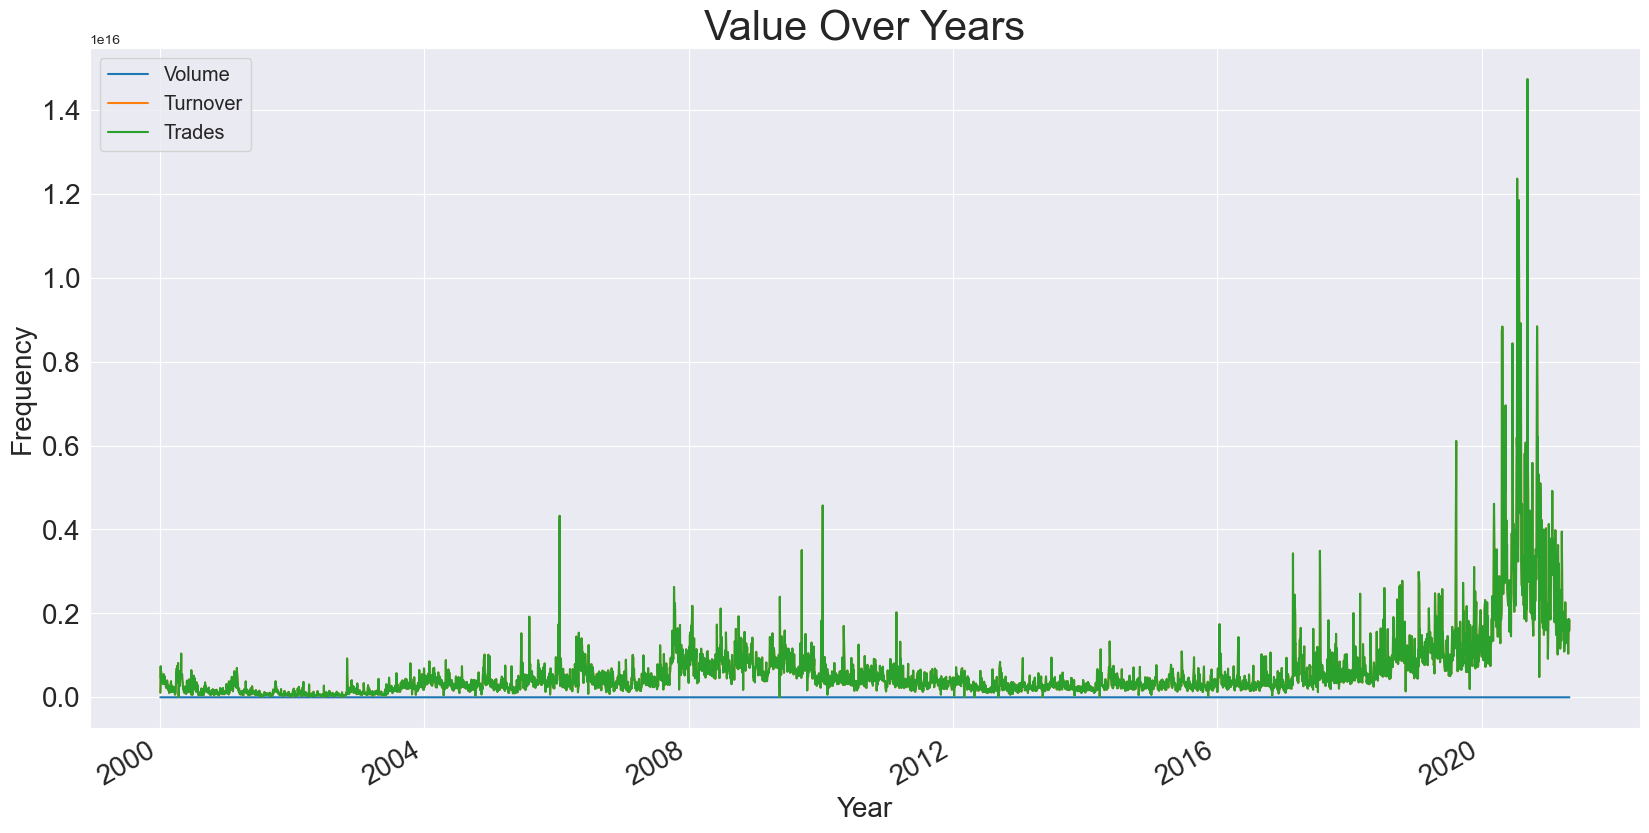

In [ ]:
ax = df_analisis[['Volume','Turnover','Trades']].plot(stacked=True)
ax.set_title('Value Over Years', fontsize=30)
ax.set_ylabel('Frequency', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize='x-large', loc='upper left')
plt.show()

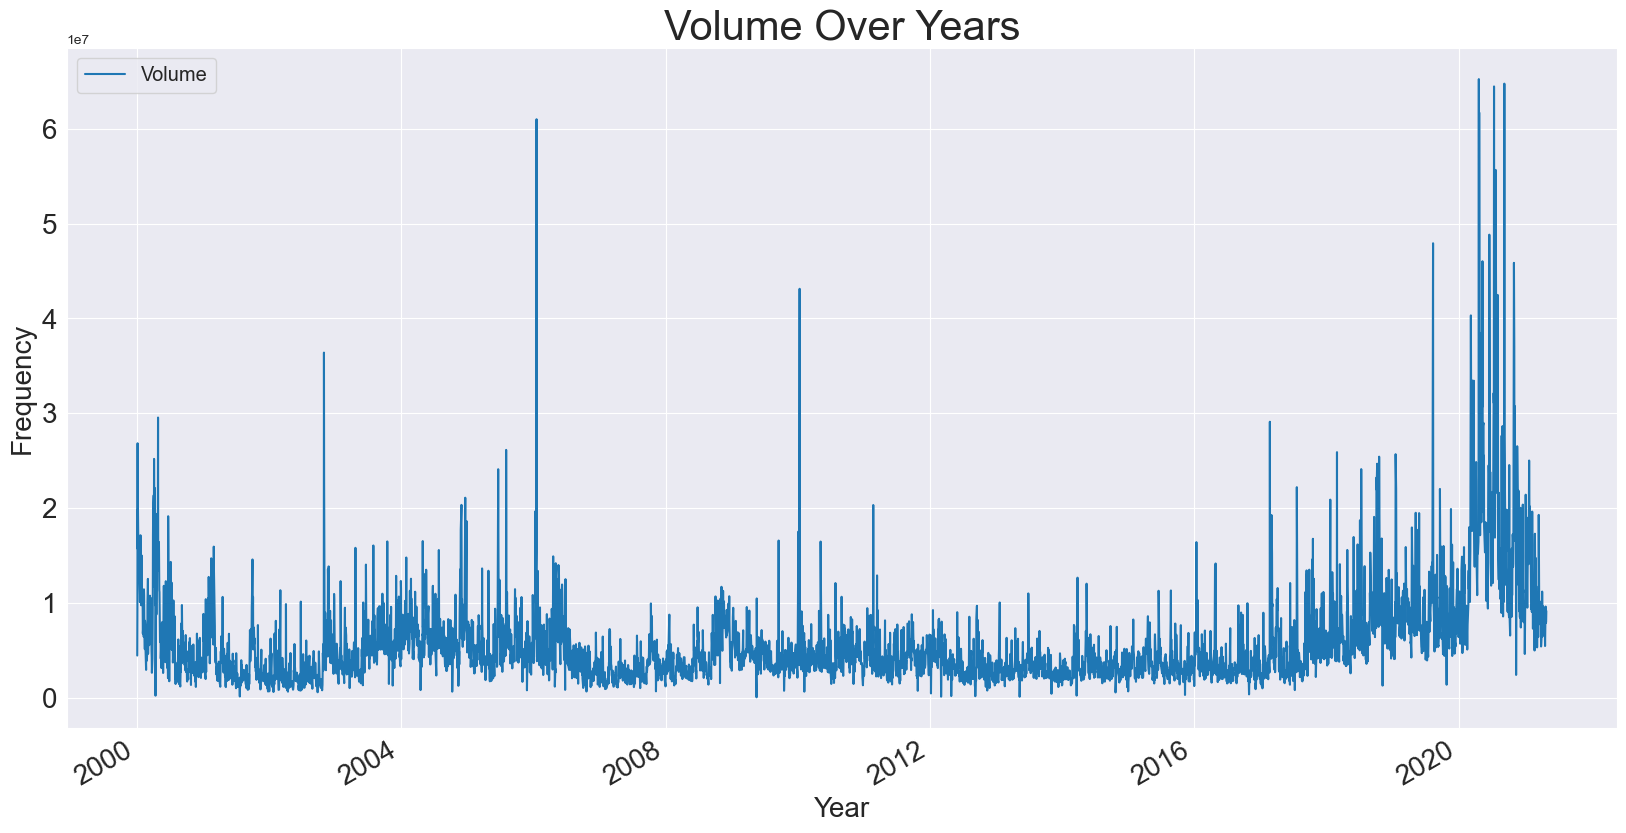

In [ ]:
ax = df_analisis[['Volume']].plot(stacked=True)
ax.set_title('Volume Over Years', fontsize=30)
ax.set_ylabel('Frequency', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize='x-large', loc='upper left')
plt.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
          x=df_analisis['Date'],
          y=df_analisis['Open'],
          name='Open',
    line=dict(color='firebrick'),
    opacity=0.8))


fig.add_trace(go.Scatter(
          x=df_analisis['Date'],
          y=df_analisis['Close'],
          name='Close',
    line=dict(color='linen'),
    opacity=0.8))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1,
                label='1m',
                step='month',
                stepmode='backward'),
            dict(count=6,
                label='6m',
                step='month',
                stepmode='backward'),
            dict(count=1,
                label='YTD',
                step='year',
                stepmode='backward'),
            dict(step='all')
        ])
    )
)

fig.update_layout(title_text='Open vs Close',
                  plot_bgcolor='rgb(248,248,255)',
                  yaxis_title='Value')

fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
          x=df_analisis['Date'],
          y=df_analisis['High'],
          name='High',
    line=dict(color='royalblue'),
    opacity=0.8))


fig.add_trace(go.Scatter(
          x=df_analisis['Date'],
          y=df_analisis['Low'],
          name='Low',
    line=dict(color='springgreen'),
    opacity=0.8))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1,
                label='1m',
                step='month',
                stepmode='backward'),
            dict(count=6,
                label='6m',
                step='month',
                stepmode='backward'),
            dict(count=1,
                label='YTD',
                step='year',
                stepmode='backward'),
            dict(step='all')
        ])
    )
)

fig.update_layout(title_text='High vs Low',
                  plot_bgcolor='rgb(248,248,255)',
                  yaxis_title='Value')

fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
          x=df_analisis['Date'],
          y=df_analisis['VWAP'],
          name='VWAP',
    line=dict(color='firebrick'),
    opacity=0.8))


fig.add_trace(go.Scatter(
          x=df_analisis['Date'],
          y=df_analisis['High'],
          name='High',
    line=dict(color='greenyellow'),
    opacity=0.8))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1,
                label='1m',
                step='month',
                stepmode='backward'),
            dict(count=6,
                label='6m',
                step='month',
                stepmode='backward'),
            dict(count=1,
                label='YTD',
                step='year',
                stepmode='backward'),
            dict(step='all')
        ])
    )
)

fig.update_layout(title_text='VWAP vs High',
                  plot_bgcolor='rgb(248,248,255)',
                  yaxis_title='Value')

fig.show()

# Time-series Analysis

melakukan transformasi data dengan teknik Moving Average dalam menghilangkan efek noise pada data dan Fine-grained variation

In [ ]:
df_lag = df_analisis.copy()
df_lag.reset_index(drop=True, inplace=True)

lag_fitur = ['High','Low','Volume','VWAP']
window1 = 3
window2 = 7
window3 = 30

#Rolling Mean
df_rolled_3d = df_lag[lag_fitur].rolling(window=window1, min_periods=0)
df_rolled_7d = df_lag[lag_fitur].rolling(window=window2, min_periods=0)
df_rolled_30d = df_lag[lag_fitur].rolling(window=window3, min_periods=0)


# Moving average
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)


# Standard deviation
df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)


# Adding the features to the dataframe
for feature in lag_fitur:
    df_lag[f'{feature}_mean_lag{window1}'] = df_mean_3d[feature]
    df_lag[f'{feature}_mean_lag{window2}'] = df_mean_7d[feature]
    df_lag[f'{feature}_mean_lag{window3}'] = df_mean_30d[feature]

    df_lag[f'{feature}_std_lag{window1}'] = df_std_3d[feature]
    df_lag[f'{feature}_std_lag{window2}'] = df_std_7d[feature]
    df_lag[f'{feature}_std_lag{window3}'] = df_std_30d[feature]

df_lag.fillna(df_lag.median(), inplace=True)

df_lag.set_index('Date', drop=False, inplace=True)
df_lag.head(11)

Date    Symbol Series  Prev Close    Open    High     Low  \
Date                                                                         
2000-01-03 2000-01-03  RELIANCE     EQ      233.05  237.50  251.70  237.50   
2000-01-04 2000-01-04  RELIANCE     EQ      251.70  258.40  271.85  251.30   
2000-01-05 2000-01-05  RELIANCE     EQ      271.85  256.65  287.90  256.65   
2000-01-06 2000-01-06  RELIANCE     EQ      282.50  289.00  300.70  289.00   
2000-01-07 2000-01-07  RELIANCE     EQ      294.35  295.00  317.90  293.00   
2000-01-10 2000-01-10  RELIANCE     EQ      314.55  317.40  318.70  305.30   
2000-01-11 2000-01-11  RELIANCE     EQ      308.50  307.95  310.95  283.85   
2000-01-12 2000-01-12  RELIANCE     EQ      288.50  289.00  305.00  282.15   
2000-01-13 2000-01-13  RELIANCE     EQ      301.70  306.00  316.40  304.10   
2000-01-14 2000-01-14  RELIANCE     EQ      311.85  309.50  321.65  309.50   
2000-01-17 2000-01-17  RELIANCE     EQ      316.30  318.25  322.90  307.05   

              Last   Close    VWAP  ...  Volume_mean_lag30  Volume_std_lag3  \
Date                                ...                                       
2000-01-03  251.70  251.70  249.37  ...          4365127.0     1.051670e+06   
2000-01-04  271.85  271.85  263.52  ...          4456424.0     1.051670e+06   
2000-01-05  286.75  282.50  274.79  ...          6972151.0     3.557775e+06   
2000-01-06  293.50  294.35  295.45  ...         13592662.0     1.173978e+07   
2000-01-07  314.50  314.55  308.91  ...         14115068.0     8.790159e+06   
2000-01-10  306.65  308.50  312.35  ...         15266250.0     5.632910e+06   
2000-01-11  288.50  288.50  296.40  ...         14958051.0     3.274382e+06   
2000-01-12  304.70  301.70  294.57  ...         14613233.0     4.001971e+06   
2000-01-13  309.75  311.85  311.79  ...         14300267.0     6.658851e+05   
2000-01-14  317.00  316.30  316.17  ...         14608686.0     2.750516e+06   
2000-01-17  307.50  308.75  315.77  ...         14493877.0     2.567858e+06   

            Volume_std_lag7  Volume_std_lag30  VWAP_mean_lag3  VWAP_mean_lag7  \
Date                                                                            
2000-01-03       1413125.25      1.909544e+06      939.586670      939.871399   
2000-01-04       1413125.25      1.909544e+06      249.369995      249.369995   
2000-01-05       3557775.25      3.557775e+06      256.445007      256.445007   
2000-01-06      11739778.00      1.173978e+07      262.559998      262.559998   
2000-01-07       9642262.00      9.642262e+06      277.920013      270.782501   
2000-01-10       8738193.00      8.738193e+06      293.049988      278.407990   
2000-01-11       7852052.50      7.852052e+06      305.570007      284.065002   
2000-01-12       7225734.50      7.225734e+06      305.886658      285.827148   
2000-01-13       5887957.00      6.748042e+06      301.106659      292.284271   
2000-01-14       5211948.00      6.379668e+06      300.920013      299.179993   
2000-01-17       2818452.75      6.025756e+06      307.510010      305.091431   

            VWAP_mean_lag30  VWAP_std_lag3  VWAP_std_lag7  VWAP_std_lag30  
Date                                                                       
2000-01-03       943.341309       7.859941      13.362704       29.018711  
2000-01-04       249.369995       7.859941      13.362704       29.018711  
2000-01-05       256.445007      10.005561      10.005561       10.005561  
2000-01-06       262.559998      12.737163      12.737163       12.737163  
2000-01-07       270.782501      16.193483      19.457516       19.457516  
2000-01-10       278.407990      17.186146      23.972639       23.972639  
2000-01-11       284.065002       8.931360      25.529587       25.529587  
2000-01-12       285.827148       8.393809      23.766977       23.766977  
2000-01-13       286.920013       9.779910      17.534094       22.219997  
2000-01-14       289.683319       9.458060      13.322284       22.377140  
2000-01-

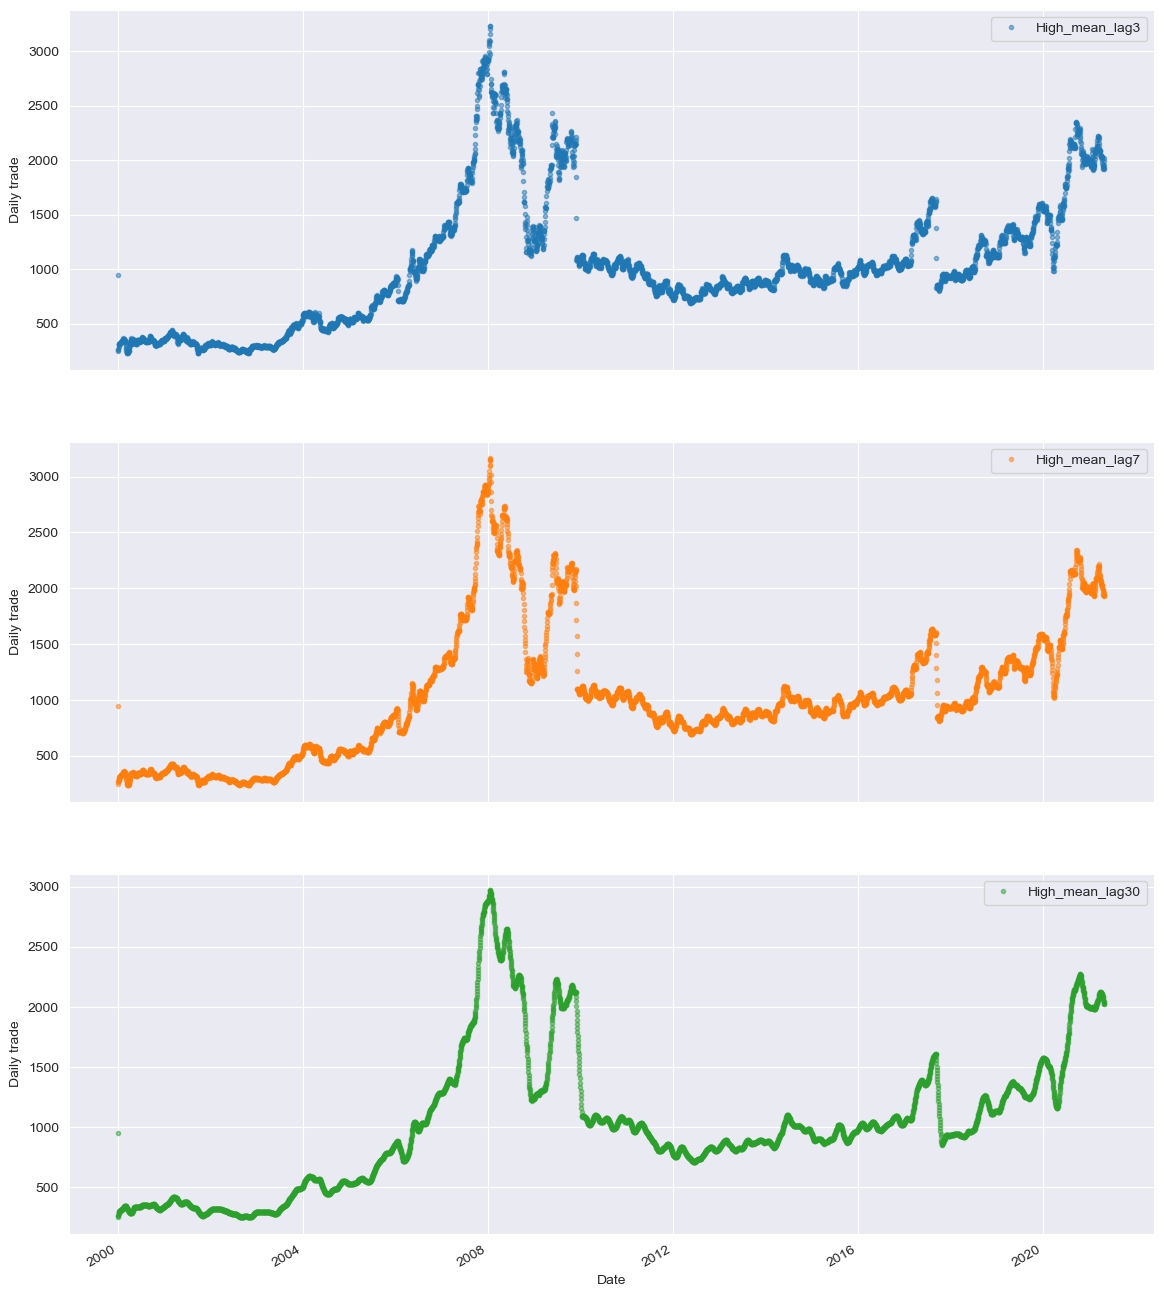

In [ ]:
cols_plot = ['High_mean_lag3','High_mean_lag7','High_mean_lag30']
axes = df_lag[cols_plot].plot(marker='.',
                                   alpha=0.5,
                                   linestyle='None',
                                   figsize=(14,18),
                                   subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

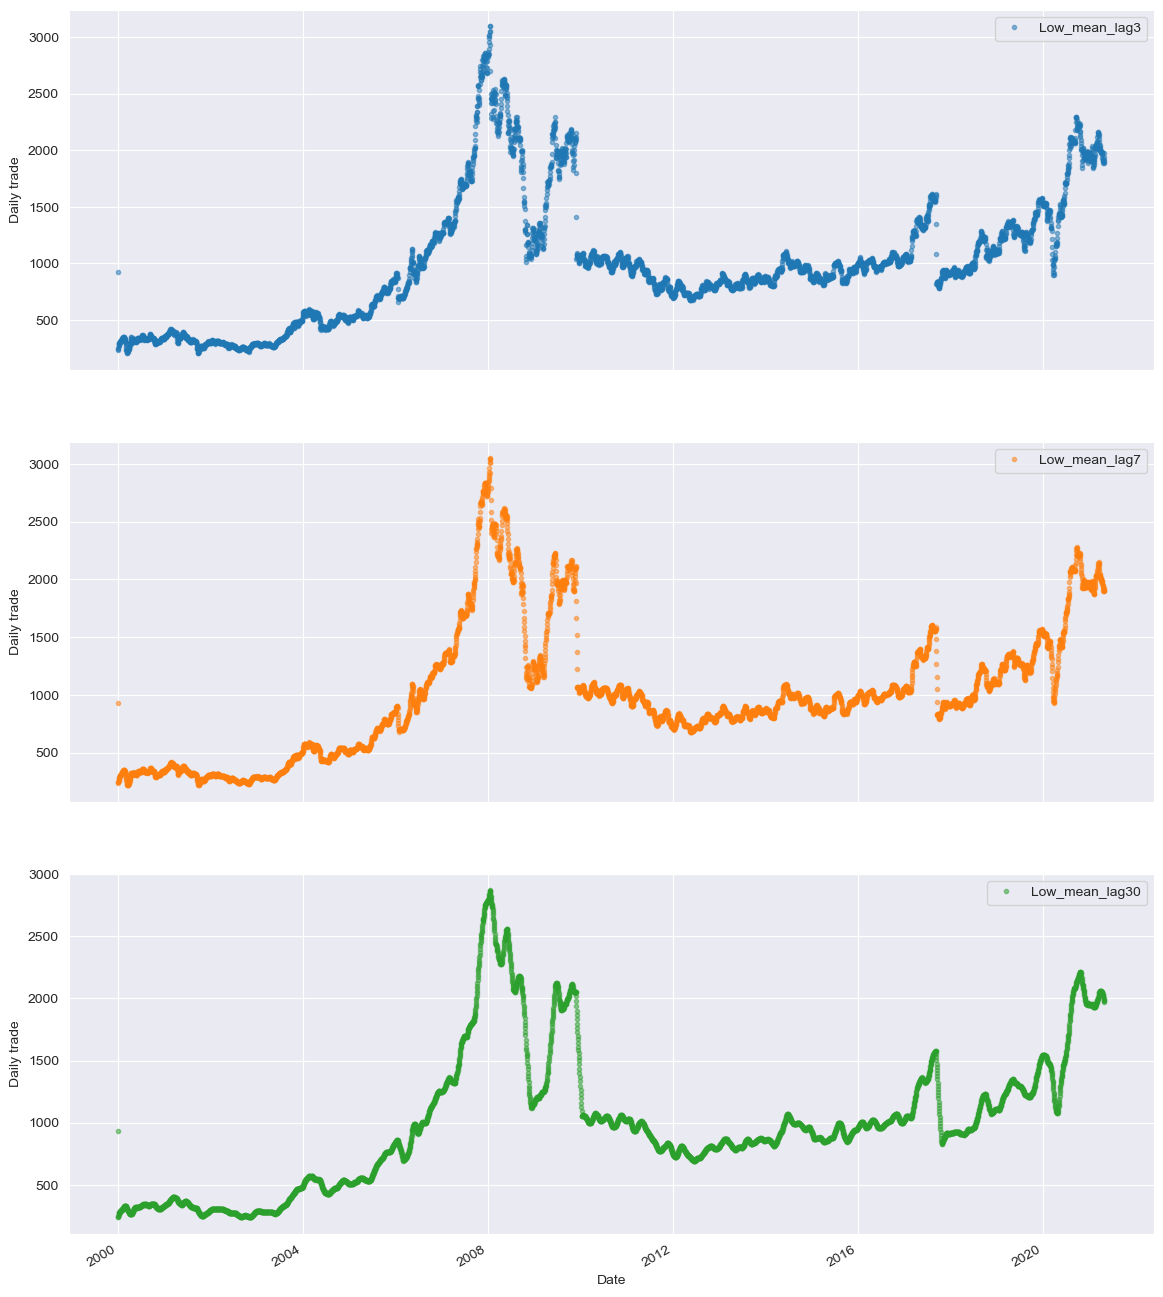

In [ ]:
cols_plot = ['Low_mean_lag3','Low_mean_lag7','Low_mean_lag30']
axes = df_lag[cols_plot].plot(marker='.',
                                   alpha=0.5,
                                   linestyle='None',
                                   figsize=(14,18),
                                   subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

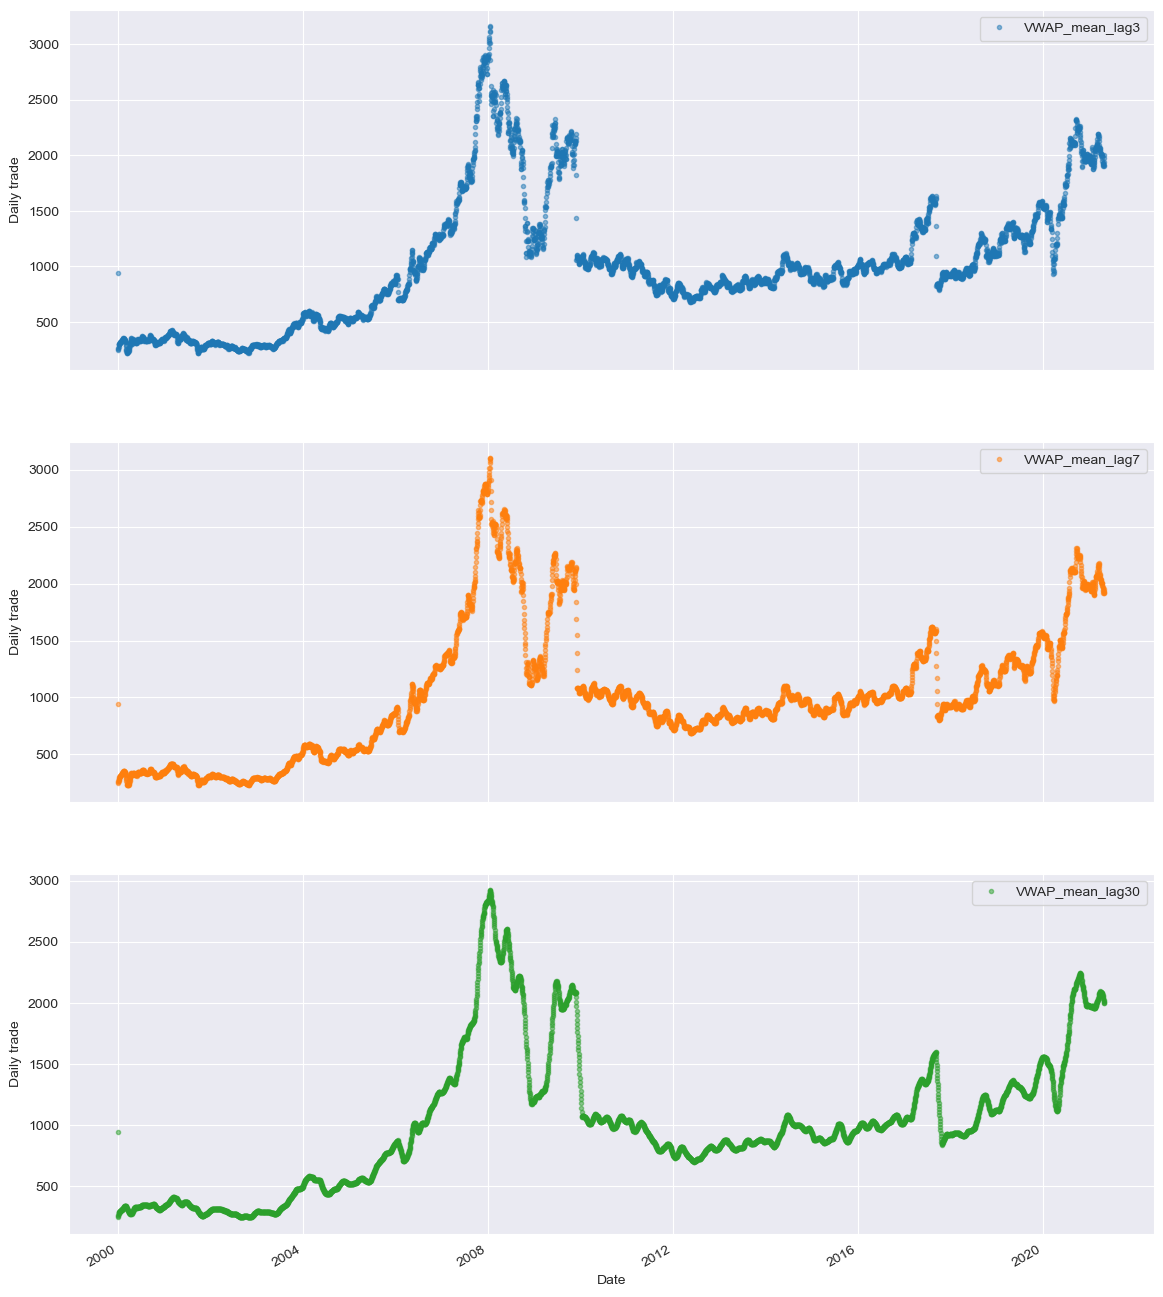

In [ ]:
cols_plot = ['VWAP_mean_lag3','VWAP_mean_lag7','VWAP_mean_lag30']
axes = df_lag[cols_plot].plot(marker='.',
                                   alpha=0.5,
                                   linestyle='None',
                                   figsize=(14,18),
                                   subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

# Volume During Phase 1 Lockdown (25 March - 14 April) & Phase 2 Lockdown (15 April - 3 May)

In [ ]:
fig = px.line(df_analisis,
             x='Date',
             y='Volume',
             title='Volume During Phase 1 Lockdown (25 March - 14 April) and Phase 2 Lockdown (15 April - 3 May)', range_x=['2020-01-01','2020-06-30'])

fig.update_layout(
        shapes=[
            dict(
                type='rect',
                xref='x',
                yref='paper',
                x0='2020-03-23',
                y0=0,
                x1='2020-04-14',
                y1=1,
                fillcolor='moccasin',
                opacity=0.5,
                layer='below',
                line_width=0,
            ),
            dict(
                type='rect',
                xref='x',
                yref='paper',
                x0='2020-04-15',
                y0=0,
                x1='2020-05-03',
                y1=1,
                fillcolor='lightcoral',
                opacity=0.5,
                line_width=0,
            )],
        annotations=[dict(x='2020-04-15', y=0.99, xref='x', yref='paper',
                         showarrow=False, xanchor='right', text='Phase 01 Lockdown'),
                    dict(x='2020-05-12', y=0.99, xref='x', yref='paper',
                        showarrow=False, xanchor='right', text='Phase 02 Lockdown')])
fig.show()

# VWAP After Lockdown

In [ ]:
fig = px.line(df_analisis,
             x='Date',
             y='VWAP',
             title='VWAP After Lockdown',
             range_x=['2020-03-02','2020-06-30'])
fig.show()

# Make a Candlestick Chart Analysis

menunjukkan pola dan trend hasil trading dari (Open, Close, High, Low) setelah fase Lockdown

In [ ]:
df_analisis_afterlockdown = df_analisis[df_analisis['Date'] >= '2020-03-23']
fig = go.Figure(data=[go.Candlestick(x=df_analisis_afterlockdown['Date'],
                open = df_analisis_afterlockdown['Open'],
                high = df_analisis_afterlockdown['High'],
                low = df_analisis_afterlockdown['Low'],
                close = df_analisis_afterlockdown['Close'])])
fig.show()

* Pola menunjukkan turun Relience sejak diberlakukan Lockdown, namun setelah lockdown 23 Maret 2020 - 11 september 2020 kinerja saham yang mengalami kenaikan.
* Dari selesai Lockdown pada 23 Maret 2020 saham Relience mencatat kenaikan kinerja saham dengan saham Close lebih dari 100% sampai dengan pertengahan bulan sepetember 2020
* Sekitar kurang lebih 7 Bulan saham Reliance mengalami pertumbuahan yang positif dengan kinerja yang bagus mempertahankan kenaikan grafik sampai pertengahan bulan september dan kembali ke jalur yang stabil sampai 27 April 2021.
* Sejak pertengahan september 2020 saham Relience mengalami pertumbuhan yang relatif stabil yaitu dari bulan November 2020 sampai dengan Januari 2021.

In [ ]:
fig = px.line(df_analisis,
             x='Date',
             y='VWAP',
             title='Major Corporate Annoncements 2020(Till June 30)',
             range_x=['2020-01-01','2020-08-30'])
fig.update_layout(plot_bgcolor='rgb(250,242,242)',
    yaxis_title='NIFTY 50 VWAP',
    shapes = [dict(x0='2020-03-23',
                   x1='2020-03-23',
                   y0=0,
                   y1=1,
                   xref='x',
                   yref='paper',
                   line_width=4,
                   opacity=0.3,
                   line_color='teal',
                   editable=False),
             dict(x0='2020-04-22',
                 x1='2020-04-22',
                 y0=0,
                 y1=1,
                 xref='x',
                 yref='paper',
                 line_width=4,
                 opacity=0.5,
                 line_color='tomato'),
             dict(x0='2020-05-04',
                 x1='2020-05-04',
                 y0=0,
                 y1=1,
                 xref='x',
                 yref='paper',
                 line_width=4,
                 opacity=0.5,
                 line_color='crimson'),
             dict(x0='2020-05-17',
                 x1='2020-05-17',
                 y0=0,
                 y1=1,
                 xref='x',
                 yref='paper',
                 line_width=4,
                 opacity=0.5,
                 line_color='darkseagreen'),
             dict(x0='2020-03-30',
                 x1='2020-03-30',
                 y0=0,
                 y1=1,
                 xref='x',
                 yref='paper',
                 line_width=4,
                 opacity=0.5,
                 line_color='royalblue')],
    annotations=[dict(x='2020-03-23',
                      y=0.76,
                      xref='x',
                      yref='paper',
                      showarrow=False,
                      xanchor='left',
                      text='Relience Support to Fight Againts Coronavirus'),
                dict(x='2020-04-22',
                     y=0.65,
                     xref='x',
                     yref='paper',
                     showarrow=False,
                     xanchor='right',
                     text='Facebook Invested in Jio Platforms'),
                dict(x='2020-05-04',
                     y=0.08,
                     xref='x',
                     yref='paper',
                     showarrow=False,
                     xanchor='left',
                     text='Silver Lake Invested in Jio Platforms'),
                dict(x='2020-05-17',
                     y=0.85,
                     xref='x',
                     yref='paper',
                     showarrow=False,
                     xanchor='left',
                     text='General Atlantic Invested in Jio Platforms'),
                dict(x='2020-03-30',
                     y=0.95,
                     xref='x',
                     yref='paper',
                     showarrow=False,
                     xanchor='right',
                     text='Rs. 500 Crore Contribution to PM CARES Fund'),
                ]
)
fig.show()

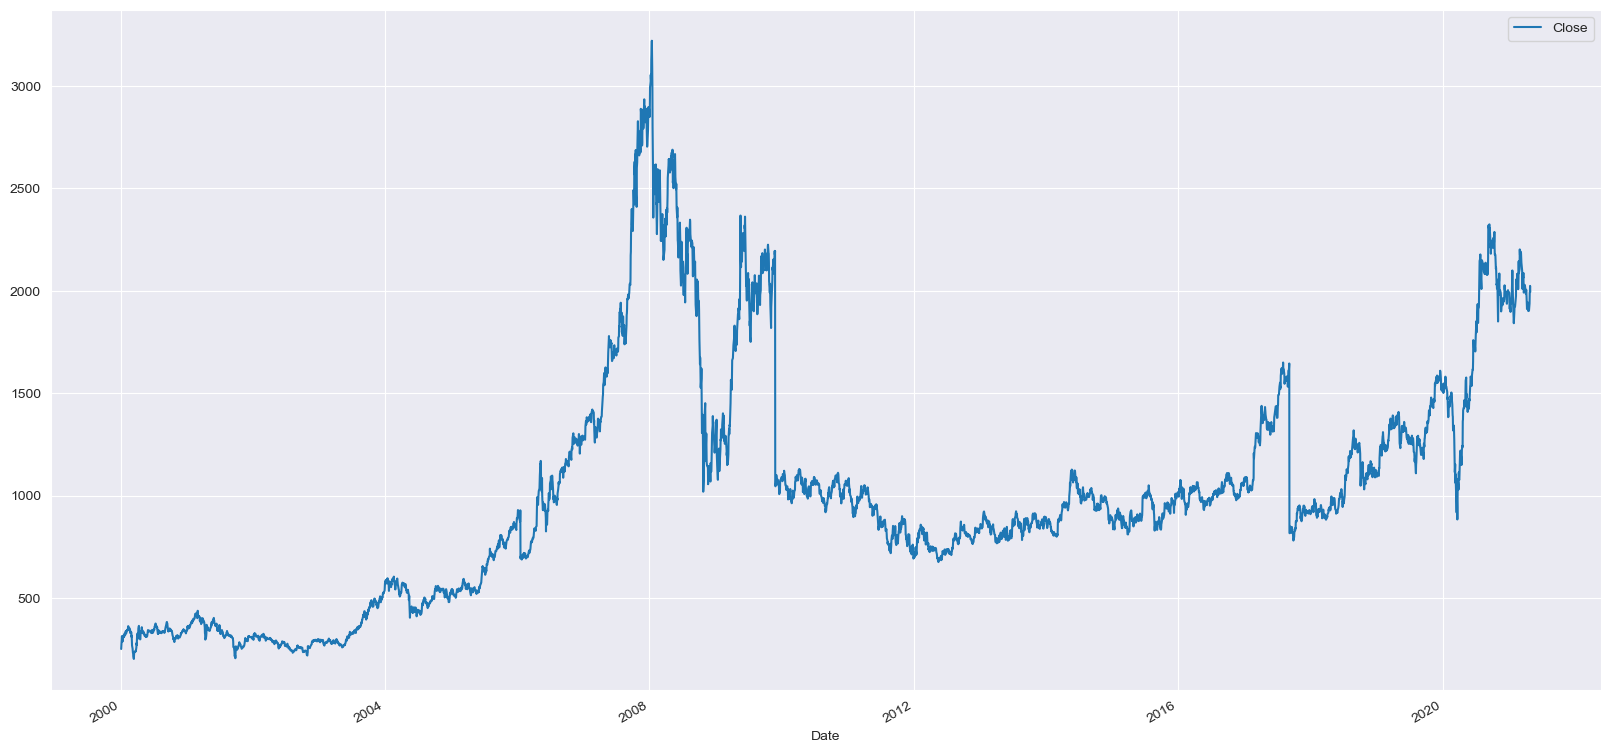

In [ ]:
df_stationarity = df_analisis[['Close']]
df_stationarity.plot()
plt.show()

In [ ]:
test_result = adfuller(df_stationarity['Close'])
def adfuller_test(price):
    result = adfuller(price)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used','Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+ ' : '+str(value))
    if result[1] <= 0.05:
        print('Strong Evidence Againts the Null Hypothesis(Ho), Reject the Null Hypothesis. Data Has no Unit Root and is Stationary')

    else:
        print('Weak Evidence Againts null Hypothesis, Time Series has a Unit root, Indicating it is non-statonary')
adfuller_test(df_stationarity['Close'])

ADF Test Statistic : -1.8490521097251085
p-value : 0.3563947012604256
#Lags Used : 20
Number of Observations Used : 5285
Weak Evidence Againts null Hypothesis, Time Series has a Unit root, Indicating it is non-statonary


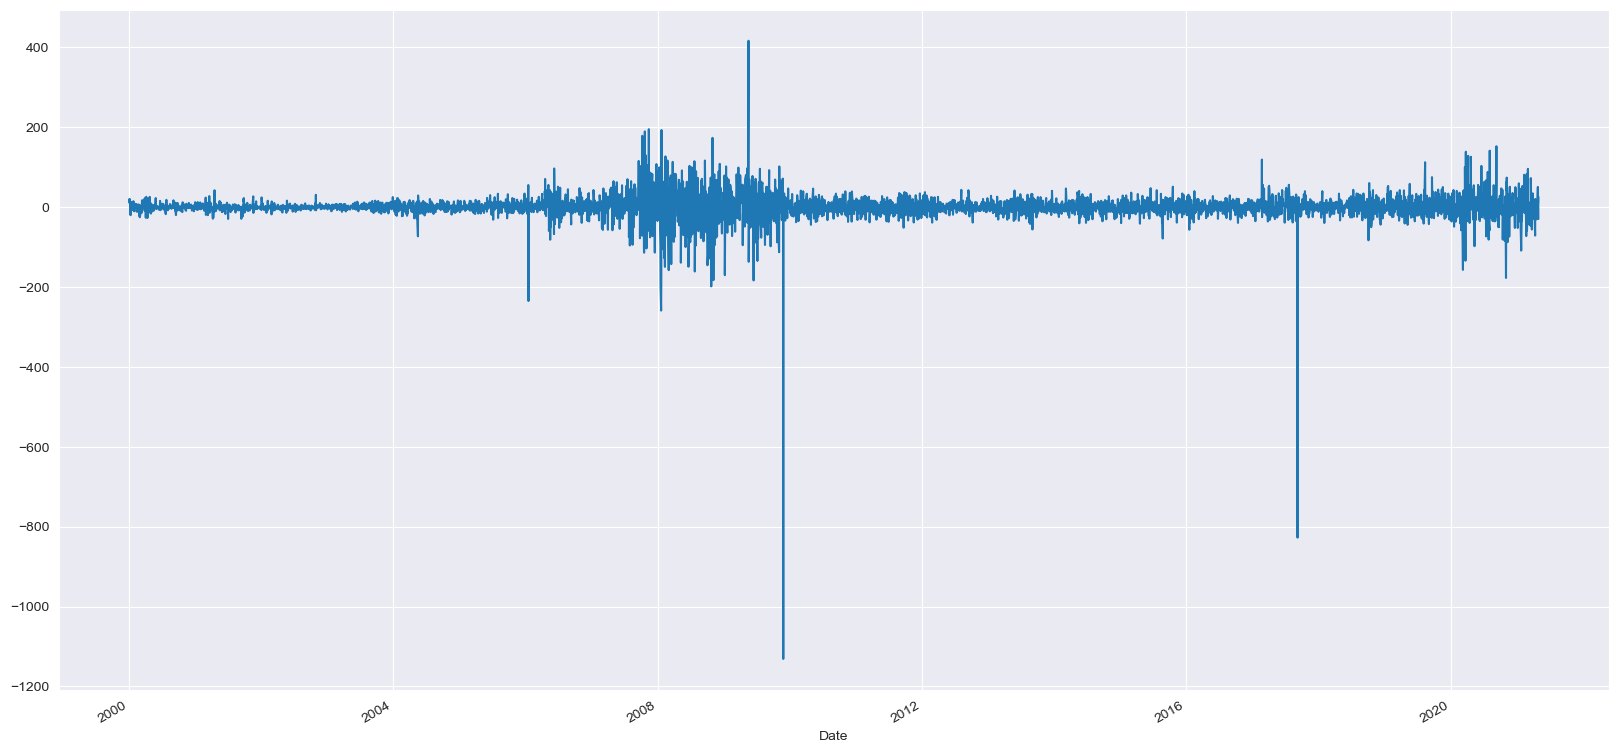

In [ ]:
df_stationarity['Close First Difference'] = df_stationarity['Close'] - df_stationarity['Close'].shift(1)
df_stationarity['Close First Difference'].plot()
plt.show()

# Building Models Forecasting and Prediction

In [ ]:
train = df_lag[df_lag.Date < '2019']
validation = df_lag[df_lag.Date >= '2019']

In [ ]:
exogenous_features = ['High_mean_lag3','High_mean_lag7', 'High_mean_lag30', 'High_std_lag3', 'High_std_lag7',
       'High_std_lag30', 'Low_mean_lag3', 'Low_mean_lag7', 'Low_mean_lag30',
       'Low_std_lag3', 'Low_std_lag7', 'Low_std_lag30', 'Volume_mean_lag3',
       'Volume_mean_lag7', 'Volume_mean_lag30', 'Volume_std_lag3',
       'Volume_std_lag7', 'Volume_std_lag30', 'VWAP_mean_lag3',
       'VWAP_mean_lag7', 'VWAP_mean_lag30', 'VWAP_std_lag3', 'VWAP_std_lag7',
       'VWAP_std_lag30','month', 'week', 'day', 'day of week']

# Training and Prediction

In [ ]:
model = auto_arima(train.Close,
                  exogenous=train[exogenous_features],
                  trace=True,
                  error_action='ignore',
                  supperess_warning=True)
model.fit(train.Close, exogenous = train[exogenous_features])

validation['Forecast_ARIMAX'] = model.predict(n_periods=len(validation), exogenous=validation[exogenous_features])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=46534.334, Time=3.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=46575.276, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=46571.295, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=46571.287, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=46573.420, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=46562.819, Time=2.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=46560.346, Time=3.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=46535.054, Time=7.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=46535.045, Time=5.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=46573.282, Time=1.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=46546.351, Time=1.72 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=46543.550, Time=2.88 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=46535.601, Time=6.01 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=46532.503, Time=1.22 sec
 ARIMA(1,1,2)(0,0,0

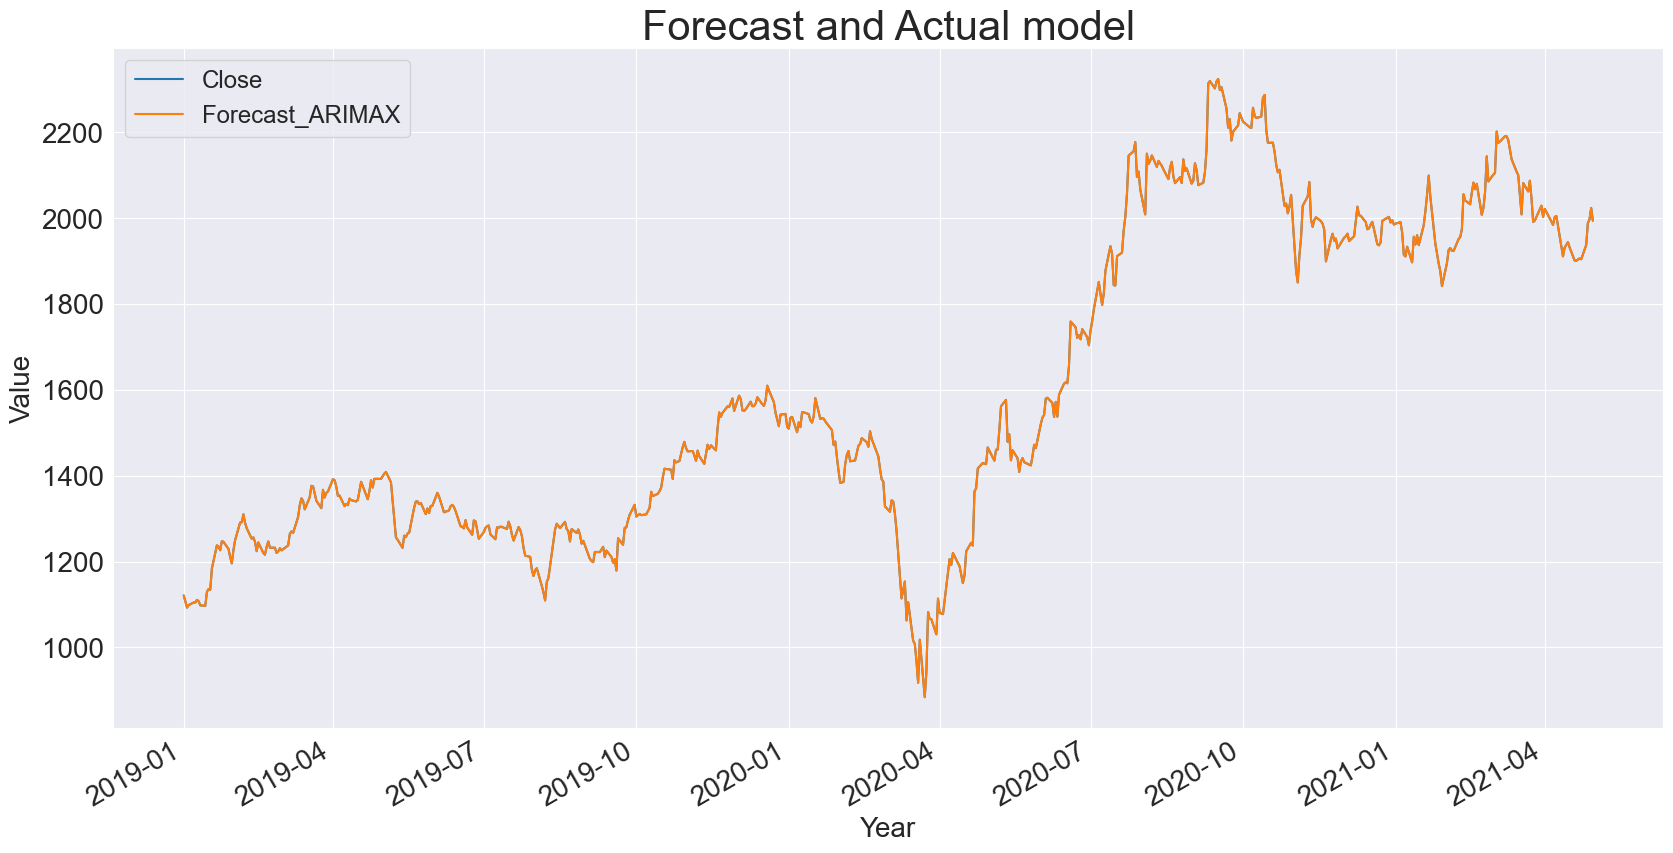

In [ ]:
ax = validation[['Close', 'Forecast_ARIMAX']].plot(stacked=True)
ax.set_title('Forecast and Actual model', fontsize=30)
ax.set_ylabel('Value', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize='xx-large', loc='upper left')
plt.show()